# Hypothesis Testing with Insurance Data

## Import libraries

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Load in the data

In [6]:
df = pd.read_csv(r"Data\insurance data.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
df.shape

(1338, 7)

In [34]:
# check for null values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Q1. Do Smokers have a higher insurance charge than non-smokers?

### Hypothesis

**Null Hypothesis** - There is no difference in insurance charges between smokers versus non-smokers.

**Alternate Hypothesis** - There is a difference between insurance charges between smokers versus non-smokers.

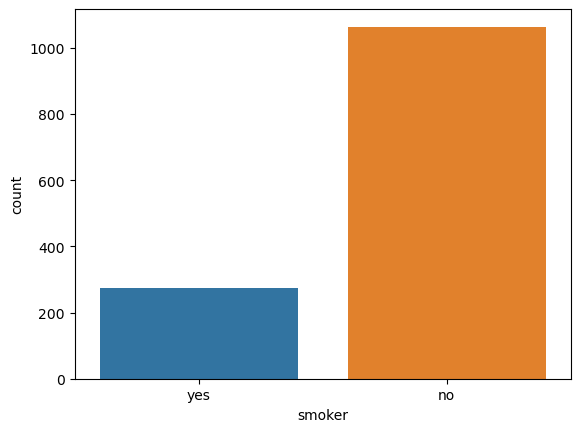

In [13]:
# Visualize the two groups 
sns.countplot(data=df, x='smoker');

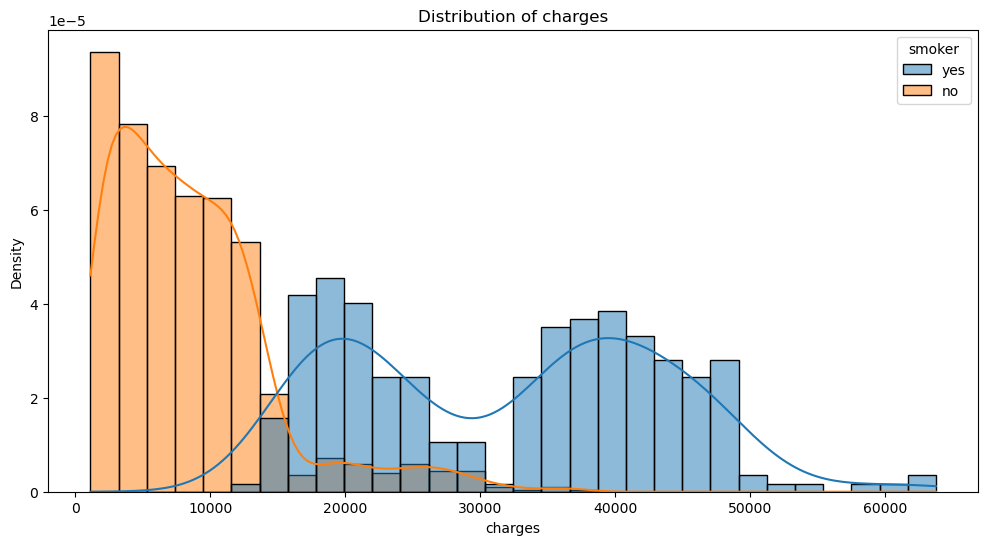

In [53]:
# Create a histogram of charges per category smoker vs non smoker
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(data=df, x='charges',hue='smoker',common_norm=False,
stat='density',kde=True)
ax.set_title('Distribution of charges');

In [40]:
# separate the 2 groups into 2 variables
smoke_yes = df.loc[df['smoker']=='yes','charges'].copy()
smoke_no = df.loc[df['smoker']=='no','charges'].copy()

smoke_yes.head()
smoke_no.head()

1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
Name: charges, dtype: float64

### T-Test Assumptions 

* Since we are comparing a numeric measurement **(charges)** between two groups **(smoker Y/N)** we want to run a 2-sample (AKA independant T-test)

* Initial assumptions
    -  No significant outliers
    -  Normality
    -  Equal Variance

### Outliers test

In [41]:
# Check the smoker group for outliers using z-score >3 rule
outliers_yes = np.abs(stats.zscore(smoke_yes))>3
outliers_yes.sum()

# Check the non-smoker group for outliers using z-score > 3
outliers_no = np.abs(stats.zscore(smoke_no))>3
outliers_no.sum()

24

In [42]:
# Remove outliers from the non-smoker group
outliers_no = outliers_no[(np.abs(stats.zscore(outliers_no)) < 3)]

### Normality Assumptions

In [31]:
# Use the normaltest method to check if smoker group is normally distributed
result_yes = stats.normaltest(smoke_yes)
result_yes.pvalue < .05

True

In [32]:
# Use the normaltest method to check if smoker group is normally distributed
result_no = stats.normaltest(smoke_yes)
result_no.pvalue < .05

True

We have confirmed that both distributions do not meet the normality test.

### Equal variance

In [47]:
# We shall test for equal variance Levene's test
result = stats.ttest_ind(smoke_no, smoke_yes, equal_var = False)
result

Ttest_indResult(statistic=-32.751887766341824, pvalue=5.88946444671698e-103)

In [48]:
## is our result significant
print(f"p-value={result.pvalue:.10f}")
print(f"Significant: {result.pvalue <.05}")

p-value=0.0000000000
Significant: True


### Interpretation 

* Based on the test above, we reject null hypothesis that smokers don't pay a higher charges versus non-smokers.

We accept the Alternate hypothesis. 

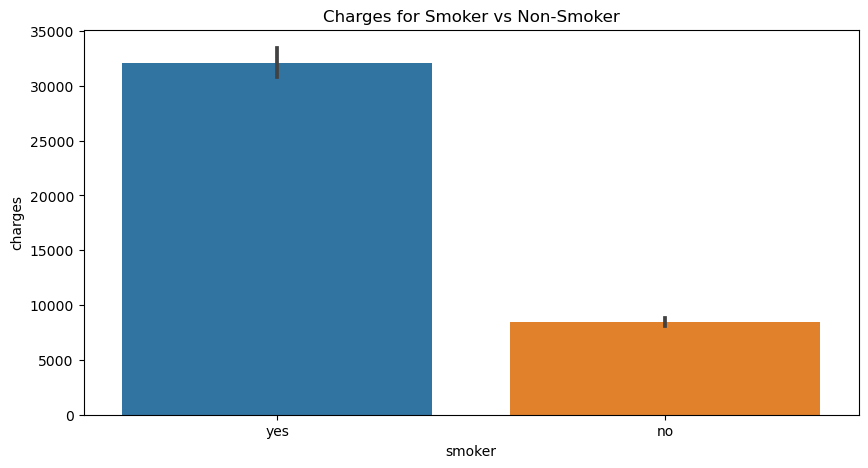

In [63]:
# Plot a barplot of the charges faced for being a smoker vs non-smoker
fig, ax = plt.subplots(figsize = (10, 5))
sns.barplot(data=df, x='smoker',y='charges')
ax.set_title('Charges for Smoker vs Non-Smoker');

## Q2. Are men more likely to smoke than women?

### Hypothesis

**Null Hypothesis** - The sex of the client/customer would have no difference or impact on whether the client/customer is a smoker.

**Alternate Hypothesis** - The sex of the client/customer would have a difference or impact on whether the client/customer is a smoker.

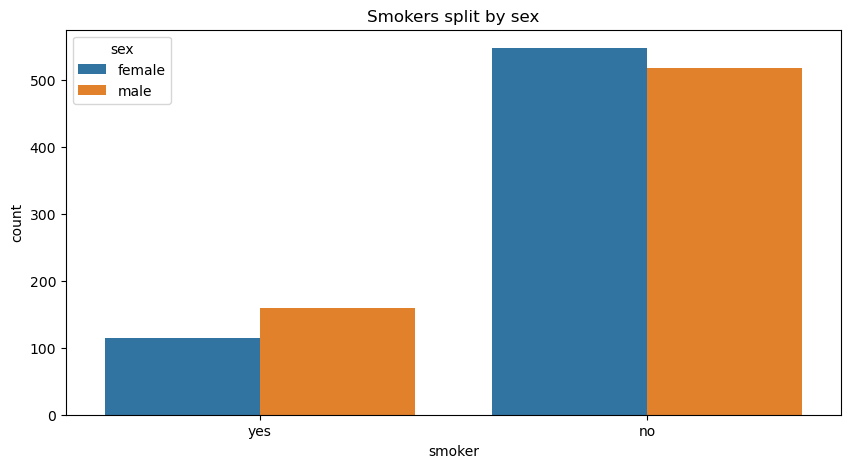

In [64]:
# Visualize the two groups 
fig, ax = plt.subplots(figsize = (10,5))
sns.countplot(data=df, x='smoker', hue = 'sex')
ax.set_title('Smokers split by sex');

In [67]:
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [68]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result #this labels the results

In [69]:
# What was our p-value?
print(p)
p<.05

0.006548143503580696


True

### Interpretation
Based on the above result, the p value is greater than 0.05 and thus we can reject the null hypothesis.

We can accept the alternate hypothesis and conclude that there is **a relationship** between a customer's smoker status and their sex.

## Q3. Do different region have different charges, on average?

**Null Hypothesis** - The region the customer/client is based in has little or no impact on their charges. (charges incurred is not signficant accross regions)

**Alternate Hypothesis** - The region the customer/client is based in has a little or no impact on their charges. (charges incurred are signficant accross regions)

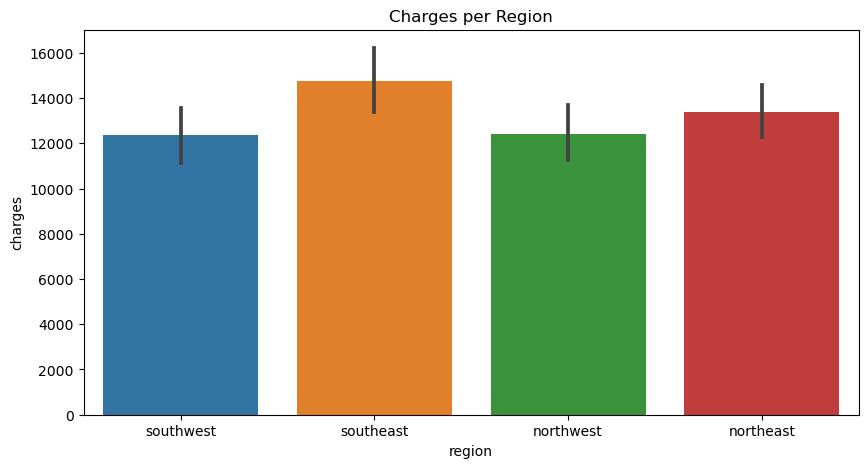

In [72]:
# Plot a barplot of the charges faced for being a smoker vs non-smoker
fig, ax = plt.subplots(figsize = (10, 5))
sns.barplot(data=df, x='region',y='charges')
ax.set_title('Charges per Region');

### Normality Test

In [73]:
## Create groups dictionary. 
region = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    region[i] = data
region.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [74]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in region.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
region_results_df = pd.DataFrame(norm_results).T
region_results_df


,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [76]:
### checking sig with pandas 
region_results_df['sig'] = region_results_df['p'] < .05 
region_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


As stated above this does not meet the normal distribution.

### Equal Variance Test

In [78]:
# Apply levene test
stats.levene(*region.values())

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

As stated above this does not meet the assumption of equal variance.

### One-Way ANOVA Test

In [79]:
# perform the correct hypothesis test
# note again the use of the * operator for convenience
result = stats.f_oneway( *region.values())
result

F_onewayResult(statistic=2.96962669358912, pvalue=0.0308933560705201)

Based on the above p-value, we would assume the null hypothesis is true that there is not much variance between regions.

### Tukey's Pairwise Comparisoin Test

In [80]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
## save the values as kg_lost and the labels to the Diet
values = df['charges']
labels = df['region']

In [81]:
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-988.8091,0.7245,-3428.9343,1451.3161,False
northeast,southeast,1329.0269,0.4745,-1044.9417,3702.9955,False
northeast,southwest,-1059.4471,0.6792,-3499.5723,1380.6781,False
northwest,southeast,2317.8361,0.0583,-54.1994,4689.8716,False
northwest,southwest,-70.638,0.9999,-2508.8826,2367.6066,False
southeast,southwest,-2388.4741,0.0477,-4760.5096,-16.4386,True


### Interpretation

Based on Tukey's Pairwise Comparison Test, we can confirm that 5 out of the 6 results would confirm the null hypothesis of there not being a variance between regions. 

However, between Southeast and Southwest region - we have confirmed that there is a variance between those two reigons in terms of their charges.